<a href="https://colab.research.google.com/github/NeyderA/Proyecto_IA/blob/main/0_3_Modelos_e_iteraciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.1 Exploración de datos

In [ ]:
from google.colab import drive
#Se llama a drive ya que los datos se subieron a este
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importante /content/drive/MyDrive/proyecto_kagggle_presion/train.csv ### ruta del dataset, para abrirlo, hacer acceso directo de la carpeta compartida al drive

In [ ]:
#Se importan las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

import pickle

%matplotlib inline

In [ ]:
DATA_PATH="/content/drive/MyDrive/Proyecto_inteligencia/train.csv"
df_train = pd.read_csv(DATA_PATH)
DATA_PATH_2="/content/drive/MyDrive/Proyecto_inteligencia/test.csv"
df_test=pd.read_csv(DATA_PATH_2)

In [ ]:
print(DATA_PATH)

/content/drive/MyDrive/Proyecto_inteligencia/train.csv


In [ ]:
#variable donde se guardan los datos utilizados
#DATA_PATH = "/content/drive/MyDrive/proyecto_kagggle_presion/"

#sub = pd.read_csv(DATA_PATH + 'sample_submission.csv')
#df_train = pd.read_csv(DATA_PATH + 'train.csv')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

## 0.2 Preprocesado de los datos

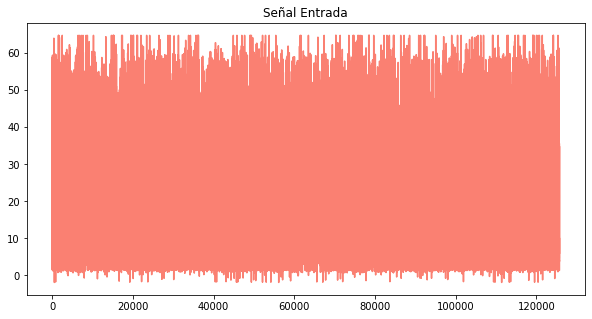

In [ ]:
#Grafican los datos de entrada
plt.figure(1, figsize = (10,5))
plt.plot(df_train['breath_id'],df_train['pressure'],'salmon')
plt.title('Señal Entrada');
#Se observa mucho ruido en la señal debido a la cantidad de datos extraidos

In [ ]:
#Se utiliza un data frame para visualizar los datos
df = df_train[df_train['breath_id'] < 30].reset_index(drop=True)
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
2075,2076,29,50,20,2.410626,4.954652,1,6.259305
2076,2077,29,50,20,2.442616,4.961355,1,6.329607
2077,2078,29,50,20,2.474634,4.967072,1,6.329607
2078,2079,29,50,20,2.506605,4.971936,1,6.399909


Text(0.5, 1.0, 'Breath Vs')

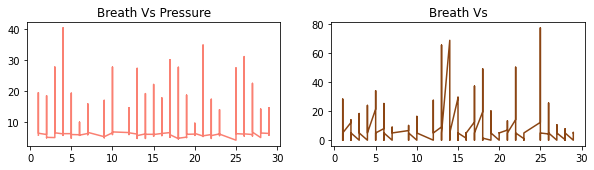

In [ ]:
plt.figure(1, figsize = (10,5))
plt.subplot(2,2,1)
plt.plot(df['breath_id'],df['pressure'],'salmon')
plt.title('Breath Vs Pressure')

plt.subplot(2,2,2)
plt.plot(df['breath_id'],df['u_in'],'saddlebrown')
plt.title('Breath Vs')

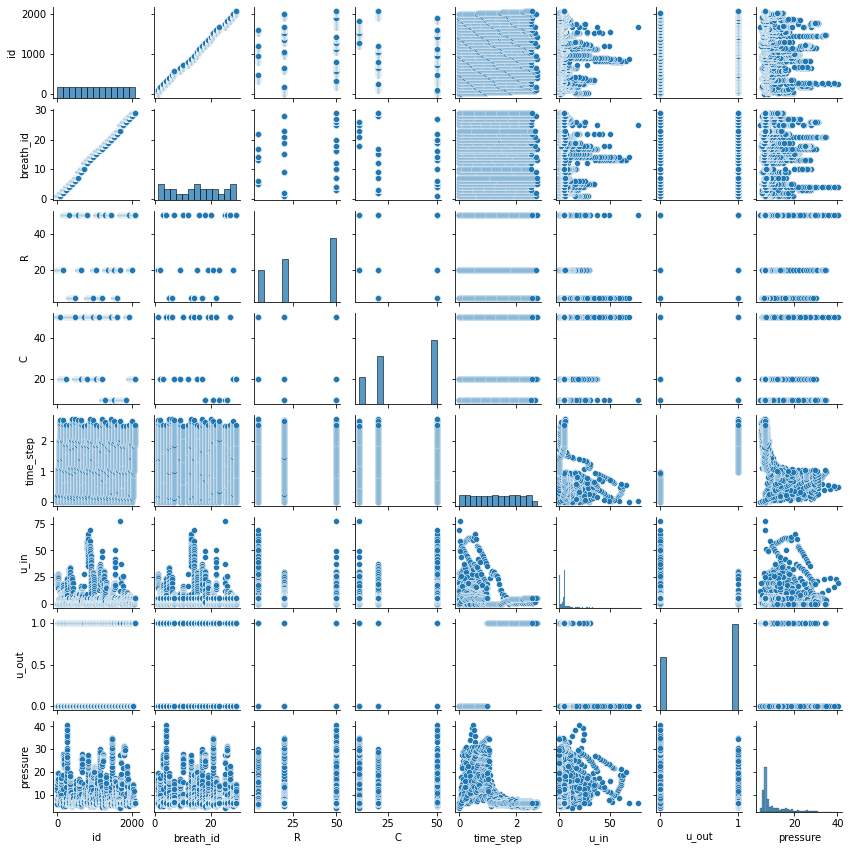

In [ ]:
g = sns.pairplot(df,height=1.5)


In [ ]:
def plot_sample(sample_id, df):
    df_breath = df[df['breath_id'] == sample_id]
    r, c  = df_breath[['R', 'C']].values[0]

    cols = ['u_in', 'u_out', 'pressure'] if 'pressure' in df.columns else ['u_in', 'u_out']
    
    plt.figure(figsize=(12, 4))
    for col in ['u_in', 'u_out', 'pressure']:
        plt.plot(df_breath['time_step'], df_breath[col], label=col)
        
    plt.legend()
    plt.title(f'Sample {sample_id} - R={r}, C={c}')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

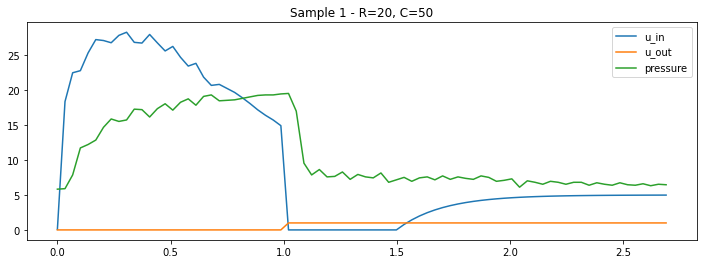

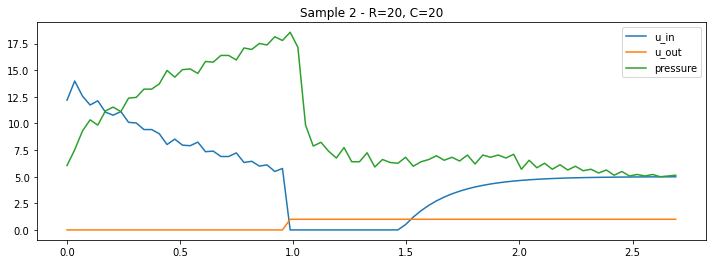

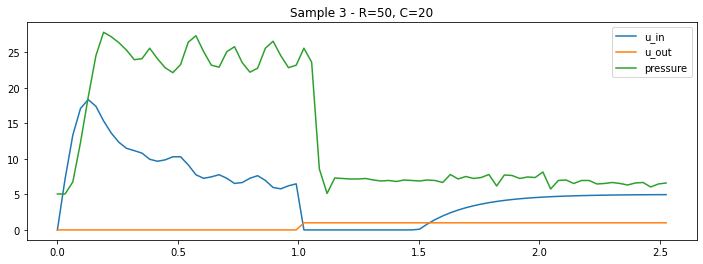

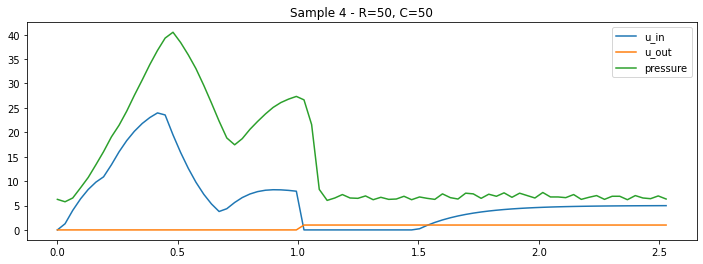

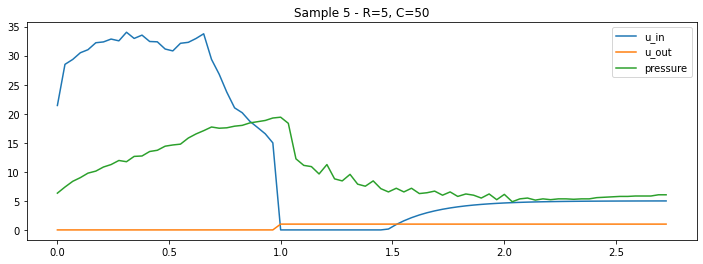

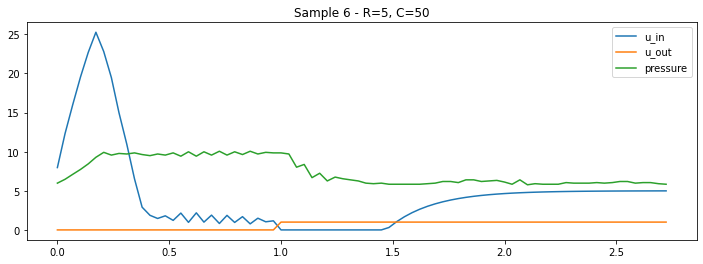

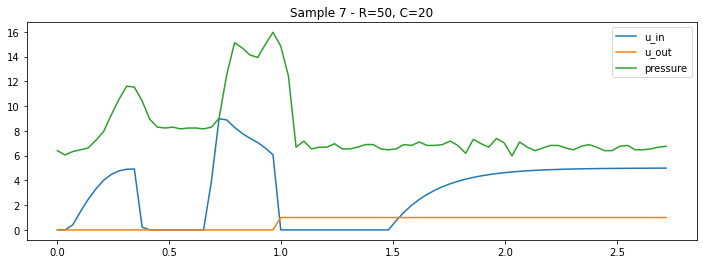

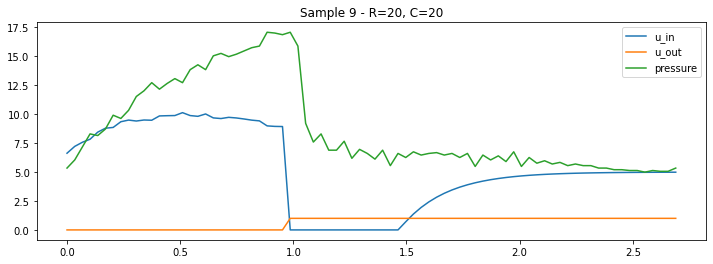

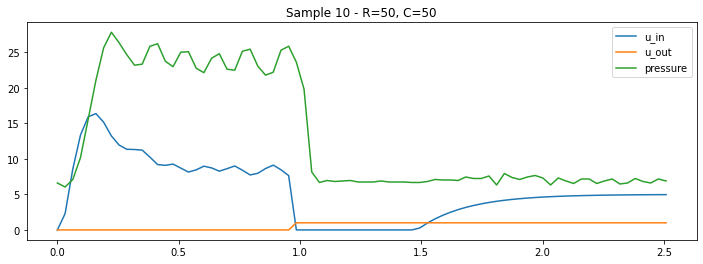

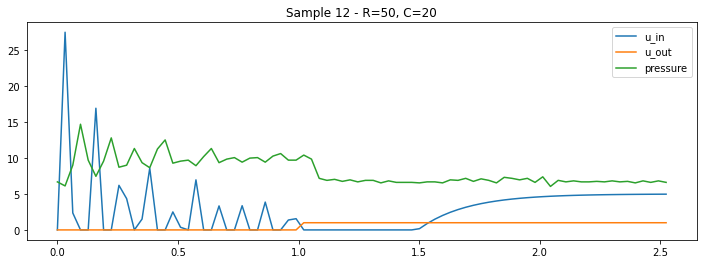

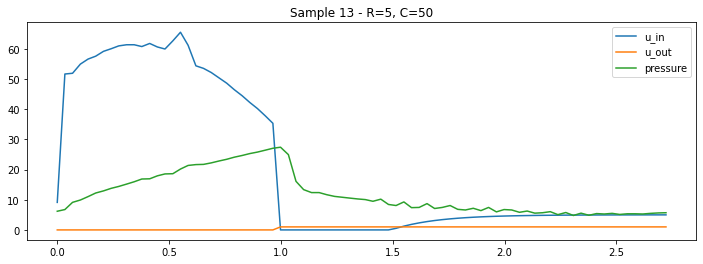

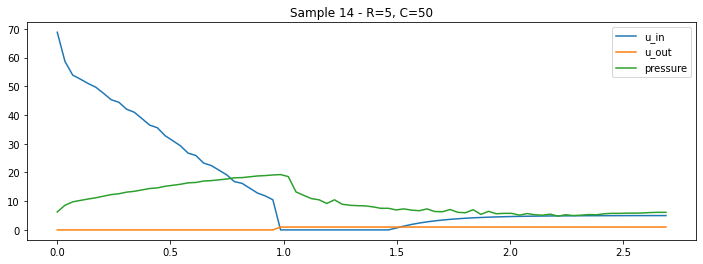

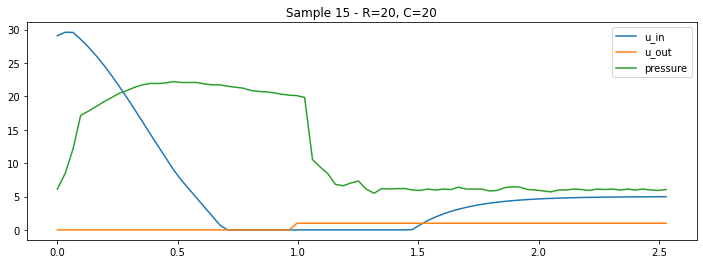

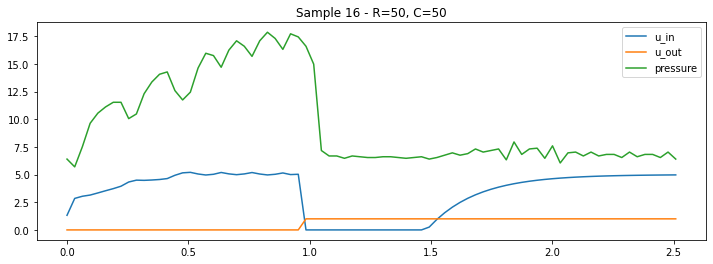

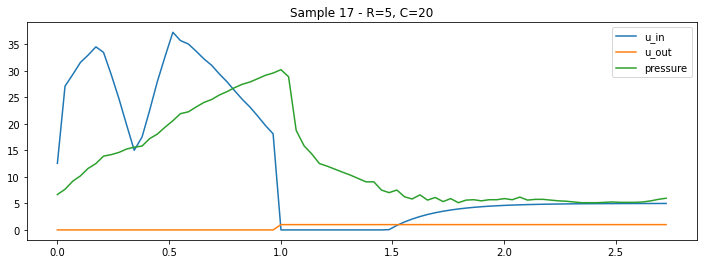

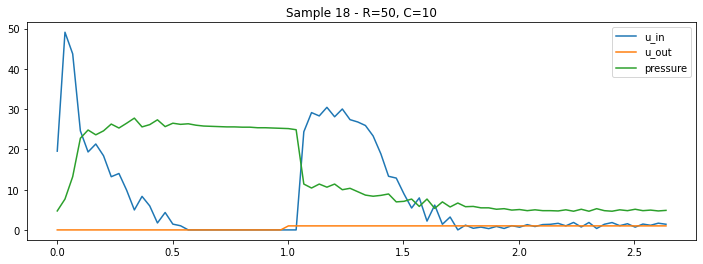

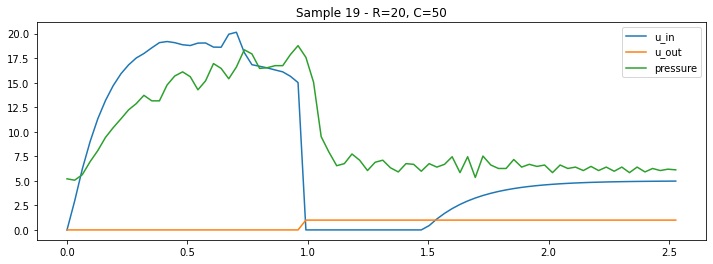

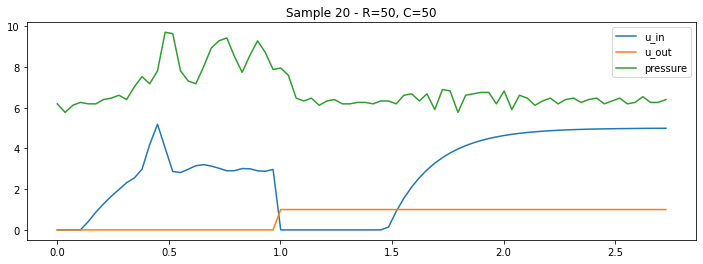

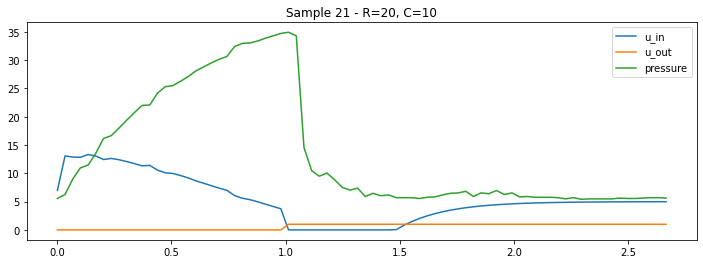

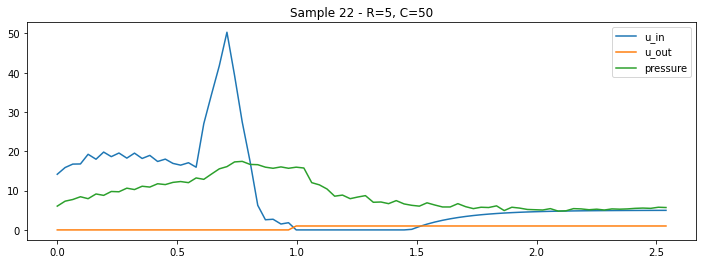

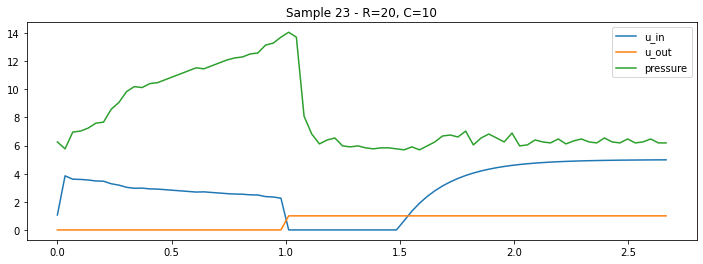

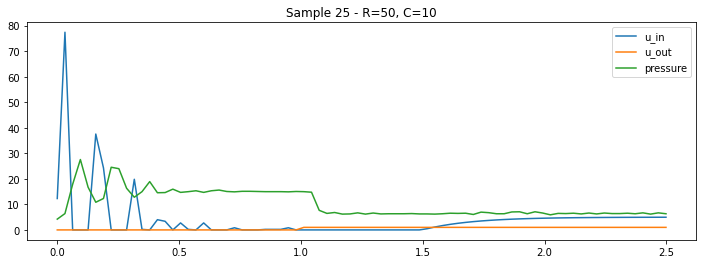

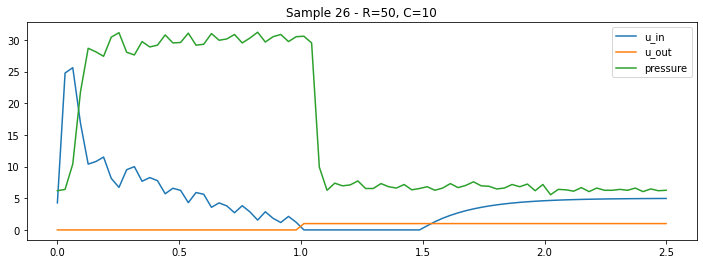

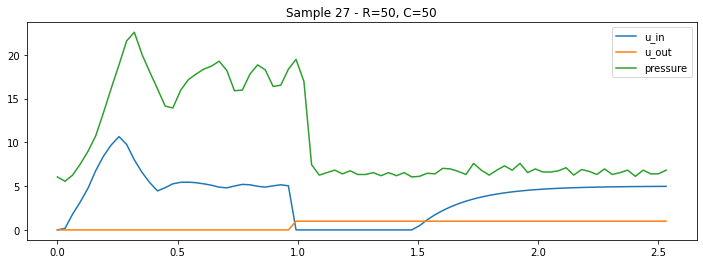

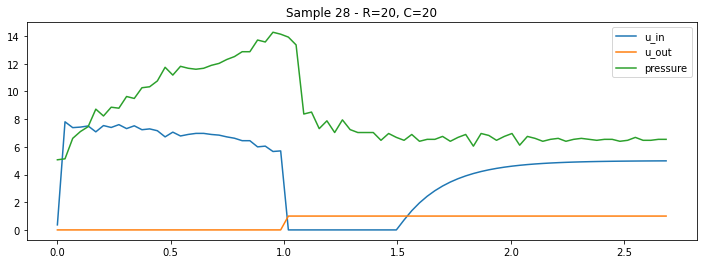

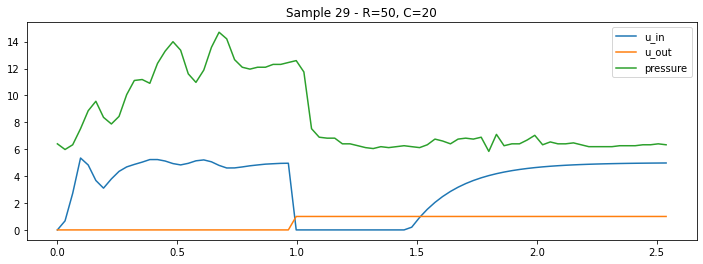

In [ ]:
#https://www.kaggle.com/code/theoviel/deep-learning-starter-simple-lstm
for i in df['breath_id'].unique():
    plot_sample(i, df_train)

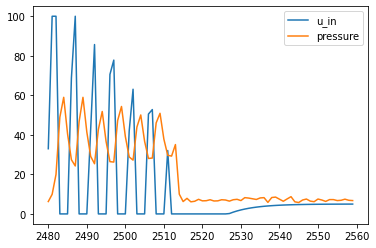

In [ ]:
#https://www.kaggle.com/code/lucasmorin/spectral-analysis-feature-engineering
DEBUG = False
dict_types = {'id': np.int32,'breath_id': np.int32,'R': np.int8,'C': np.int8,'time_step': np.float32,'u_in': np.float32,'u_out': np.int8,'pressure': np.float32,} 

all_pressure = np.sort(df_train.pressure.unique())
PRESSURE_MIN = all_pressure[0]
PRESSURE_MAX = all_pressure[-1]
PRESSURE_STEP = (all_pressure[1] - all_pressure[0])

if DEBUG:
    train = df_train[:80*1000]
    test = df_test[:80*1000]

idb = df_train.breath_id.unique()[31]

t1 = df_train[df_train.breath_id==idb].u_in
p1 = df_train[df_train.breath_id==idb].pressure

plt.plot(t1);
plt.plot(p1);
plt.legend(['u_in', 'pressure']);
plt.show();

## Modelos e iteraciones

### setting X and y 

In [ ]:

test_size = 0.3
''' validation size '''
val_size  = test_size/(1-test_size) # so that the have the same number of elements

print("test size %.2f"%test_size)
print("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))


''' WHOLE DATASET '''
X = df_train.copy().drop(columns=['pressure']).values
y = df_train.copy()['pressure'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
print("X_train.shape, X_test.shape, y_train.shape, y_test.shape")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

''' REDUCED DATASET '''
''' number of rows used '''
rows_taken = 60000
rows_available = 2000000

''' This takes rows_taken rows of the first rows_available 
E.g.  
rows_taken = a
rows_available = b

takes any a rows of the first b rows'''
reduced = df_train.copy().iloc[:rows_available].sample(rows_taken)
X_reduced = reduced.copy()
X_reduced = X_reduced.drop(columns=['pressure']).values

y_reduced = reduced.copy()
y_reduced = y_reduced["pressure"].values

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=test_size)
print("REDUCED X_train.shape, X_test.shape, y_train.shape, y_test.shape")
print(X_train_reduced.shape, X_test_reduced.shape, y_train_reduced.shape, y_test_reduced.shape)

test size 0.30
val size is 0.43 (relative to 0.70) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape
(4225200, 7) (1810800, 7) (4225200,) (1810800,)
REDUCED X_train.shape, X_test.shape, y_train.shape, y_test.shape
(42000, 7) (18000, 7) (42000,) (18000,)


In [ ]:
def report_cv_score(z):
    ''' Prints mean score and std deviation '''
    print ("test score   %.3f (±%.4f) with %d splits"%(np.mean(z["test_score"]), np.std(z["test_score"]), len(z["test_score"])))
    print ("train score  %.3f (±%.4f) with %d splits"%(np.mean(z["train_score"]), np.std(z["train_score"]), len(z["train_score"])))
    

In [ ]:
def mae(estimator, X, y):
    ''' mean absolute error scoring function '''
    preds = estimator.predict(X)
    return np.mean(np.abs(preds-y))
    

In [ ]:
cv = ShuffleSplit(n_splits = 10, test_size=val_size)

## Supervisados

### Model evaluation

Esta sección se usa para evaluar cada modelo con sus diferentes argumentos y ver si hay bias o overfitting y además ver que cantidad de datos es óptima

In [ ]:

def plot_learning_curve(estimator, title, X, y, cv=None, scoring=mae):
    
    train_size, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring)
    
    train_mean = np.mean(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Plot learning curve
    plt.figure(figsize=(10,4))
    plt.plot(train_size,train_mean, label= 'train score')
    plt.plot(train_size,test_mean, label = 'Cross validation score')

    plt.fill_between(train_size, train_mean-train_std, train_mean+train_std, color = '#DDDDDD')
    plt.fill_between(train_size, test_mean-test_std, test_mean+test_std, color = '#d6e394')

    plt.title(title)
    plt.xlabel('Train size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc= 'best')


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4225200, 7), (4225200,), (1810800, 7), (1810800,))

In [ ]:
X_train_reduced.shape, y_train_reduced.shape, X_test_reduced.shape, y_test_reduced.shape

((42000, 7), (42000,), (18000, 7), (18000,))

#### Random forest regressor evaluation

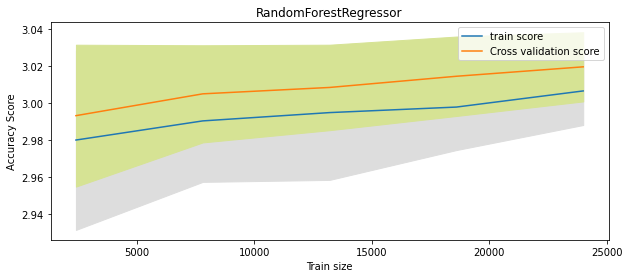

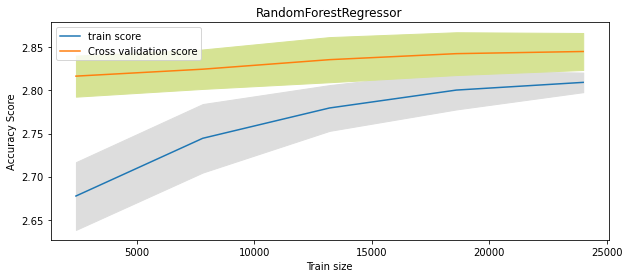

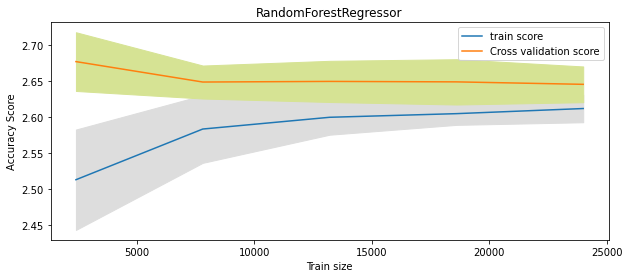

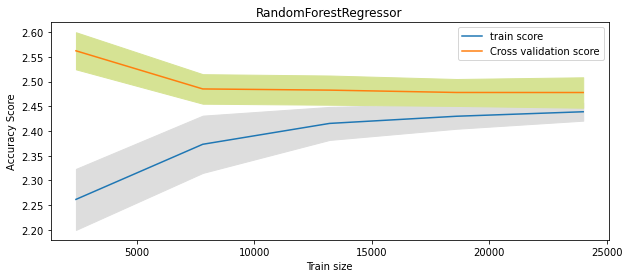

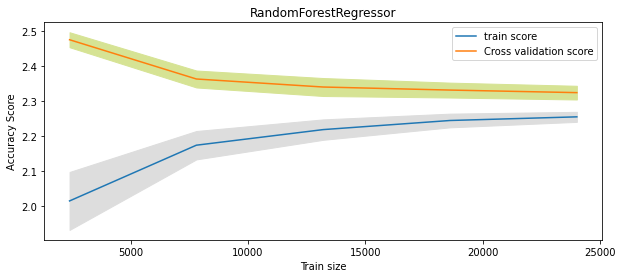

In [ ]:

#@title Aquí evaluamos el random forest regressor y evaluamos max_depth desde 3 hasta 11, encontramos que el mejor accuracy con menos bias y overfitting está entre 7 y 8, pero elegiremos el 8 porque parece tener menor bias. In this case: Models with less max_depth than 8 have bias, models with more than 8 have overfitting

#@markdown simulaciond de 3 a 7

for i in range(3,8):
    ''' 
    estimator = DecisionTreeRegressor(max_depth=i)
    estimator= SVC(gamma=i)
    '''
    estimator = RandomForestRegressor(max_depth=i, n_estimators=100)

    plot_learning_curve(estimator, estimator.__class__.__name__, X_train_reduced, y_train_reduced, cv=cv, scoring=mae)

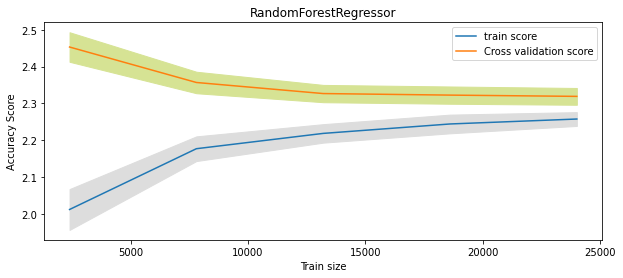

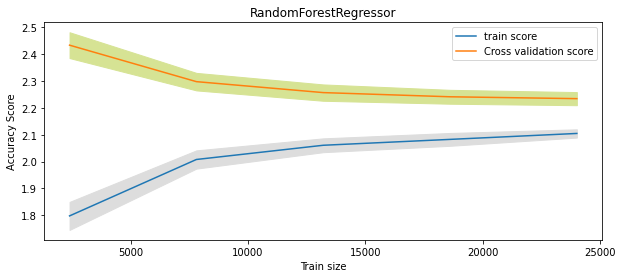

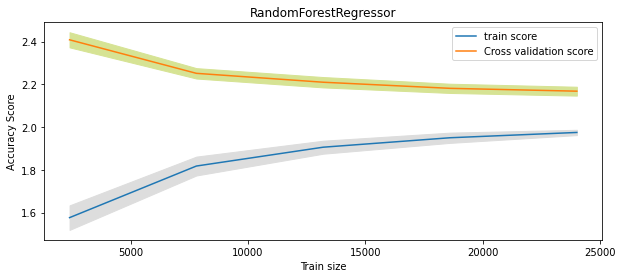

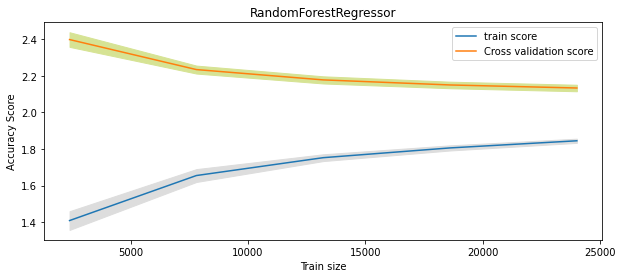

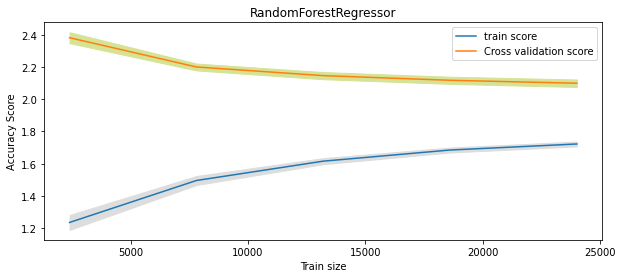

In [ ]:

#@title Simulación de 7 a 11

for i in range(7,12):
    ''' 
    estimator = DecisionTreeRegressor(max_depth=i)
    estimator= SVC(gamma=i)
    '''
    estimator = RandomForestRegressor(max_depth=i, n_estimators=100)

    plot_learning_curve(estimator, estimator.__class__.__name__, X_train_reduced, y_train_reduced, cv=cv, scoring=mae)

In [ ]:
#@title Luego vemos que valor de n_estimators tiene mejor desempeño. Notamos que no tienen una diferencia significativa, por lo que decidimos trabajar con 200 para tener buen rendimiento de computación.
for i in range(100, 600, 100):
    print(i)
    
    estimator = RandomForestRegressor(max_depth=7, n_estimators=i)

    plot_learning_curve(estimator, estimator.__class__.__name__, X_train_reduced, y_train_reduced, cv=cv, scoring=mae)

#### Desicion Tree Evaluation

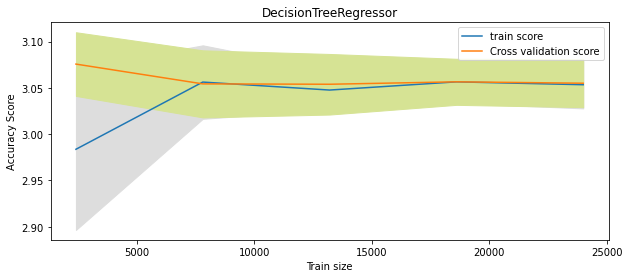

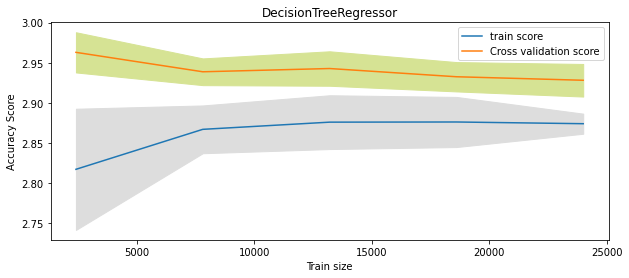

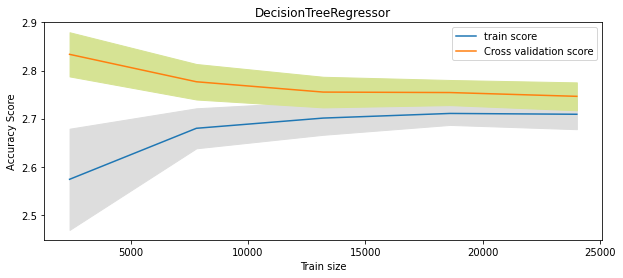

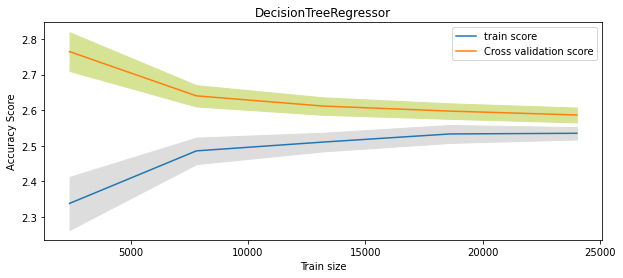

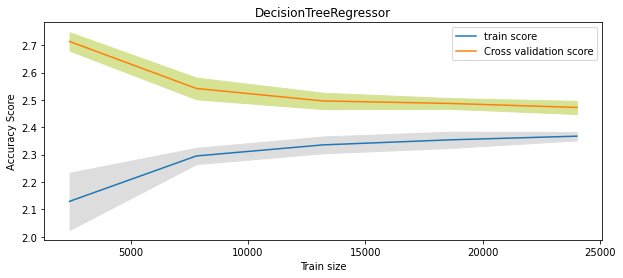

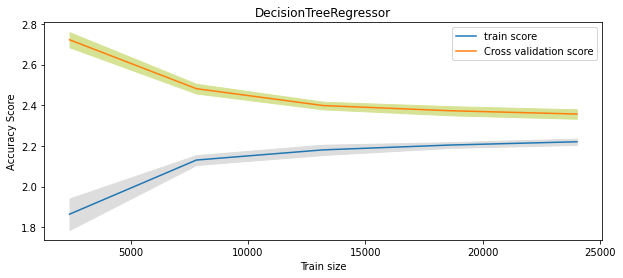

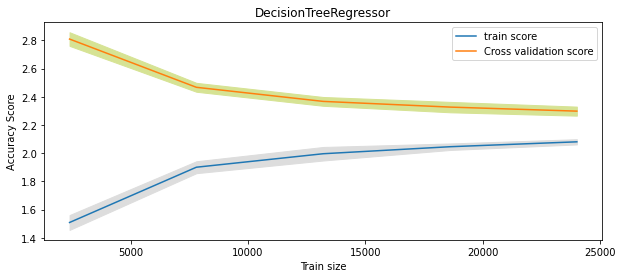

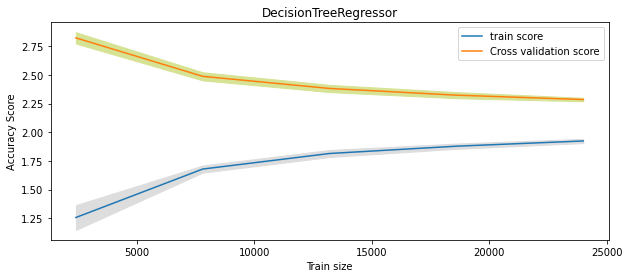

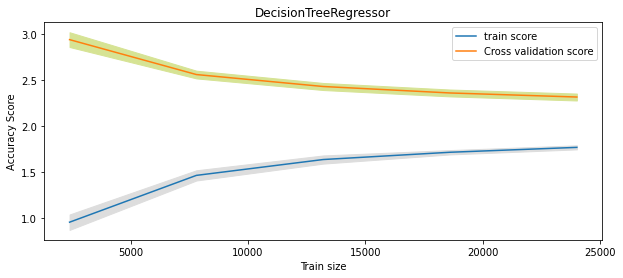

In [ ]:

#@title Aquí evaluamos el Decision tree y evaluamos max_depth desde 3 hasta 11, encontramos que el mejor rendimiento con menos bias y overfitting está en 9. In this case: Models with less max_depth than 9 have bias, models with more than 9 have overfitting

for i in range(3,12):
    ''' 
    estimator = DecisionTreeRegressor(max_depth=i)
    estimator= SVC(gamma=i)
    '''
    estimator = DecisionTreeRegressor(max_depth=i)

    plot_learning_curve(estimator, estimator.__class__.__name__, X_train_reduced, y_train_reduced, cv=cv, scoring=mae)


### Model selection

Esta seccción se usa para comparar entre diferentes modelos y escoger el de mejor desempeño

In [ ]:
# this list contains the best config (found in the section before ) of each estimator 

estimators_list = [ 
DecisionTreeRegressor(max_depth=9),
RandomForestRegressor(max_depth=8, n_estimators=200)
]

In [ ]:
#@title Aqui se evaluan los diferentes modelos, cada uno con la mejor configuración de argumentos (encontrados en la sección anterior: model evaluation)
zscores = []

for estimator in estimators_list:
    ''' executes all estimators and prints each performance '''
    print("--")
    z = cross_validate(estimator, X_train_reduced, y_train_reduced, return_train_score=True, return_estimator=False,
                       scoring=mae, cv=cv)
    report_cv_score(z)
    zscores.append(np.mean(z["test_score"]))

best = np.argmin(zscores)
print ("selecting ", best)
best_estimator = estimators_list[best]
print ("\nselected model")
print (best_estimator)

--
test score   2.320 (±0.0240) with 10 splits
train score  2.105 (±0.0229) with 10 splits
--
test score   2.247 (±0.0166) with 10 splits
train score  2.154 (±0.0142) with 10 splits
selecting  1

selected model
RandomForestRegressor(max_depth=8, n_estimators=200)


In [ ]:
best_estimator.fit(X_train_reduced,y_train_reduced)
reported_performance = mae(best_estimator, X_test, y_test)
print ("reported performance of selectd model %.3f"%reported_performance)

reported performance of selectd model 2.278


## conclusion of supervised algorithms

**We found the best estimator (evaluating bias, overfitting, accuracy and performance) between random forest regressor and dicision tree is: Random Forest Regressor with max_depth = 8, n_estimators=200**. In this case: Models with less max_depth than 8 have bias, models with more than 8 have overfitting

However, we are only using 60.000 rows (42.000 in train) (because of the performance of the hardware)  and the dataset has a total of 6 million rows. So If we want to use more data we have 3 options: 

1.   Wait longer for the execution of every model (hours or even days) 
2.   Get a better hardware
3.   Use unsupervised algorithms to simplify ( reduce dimensions of data )

In this case we will use the 3rd option.

In the next section we will use No supervised models to reduce data dimensions

## No supervisados

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4225200, 7), (4225200,), (1810800, 7), (1810800,))

In [ ]:
X_train_reduced.shape, y_train_reduced.shape, X_test_reduced.shape, y_test_reduced.shape

((42000, 7), (42000,), (18000, 7), (18000,))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

### Model evaluation

Esta sección se usa para evaluar cada modelo con sus diferentes argumentos, específicamente el n_components, y ver si hay bias o overfitting y además ver que cantidad de datos es óptima

In [ ]:
def plot_learning_curve_ns(pipeline, title, X, y, cv=None, scoring=mae):
    
    train_size, train_scores, test_scores = learning_curve(pipeline, X, y, cv=cv, scoring=scoring)
    
    train_mean = np.mean(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Plot learning curve
    plt.figure(figsize=(10,4))
    plt.plot(train_size,train_mean, label= 'train score')
    plt.plot(train_size,test_mean, label = 'Cross validation score')

    plt.fill_between(train_size, train_mean-train_std, train_mean+train_std, color = '#DDDDDD')
    plt.fill_between(train_size, test_mean-test_std, test_mean+test_std, color = '#d6e394')

    plt.title(title)
    plt.xlabel('Train size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc= 'best')

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4225200, 7), (4225200,), (1810800, 7), (1810800,))

In [ ]:
X_train_reduced.shape, y_train_reduced.shape, X_test_reduced.shape, y_test_reduced.shape

((42000, 7), (42000,), (18000, 7), (18000,))

#### PCA y Random Forest Regressor

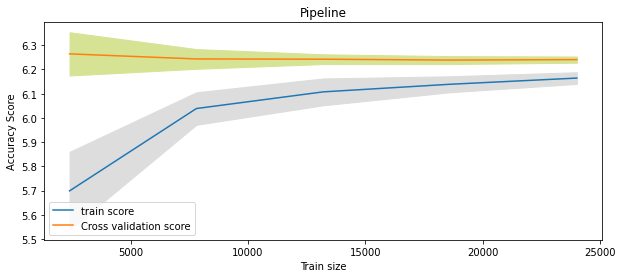

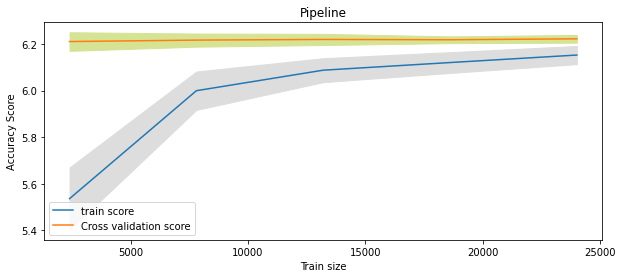

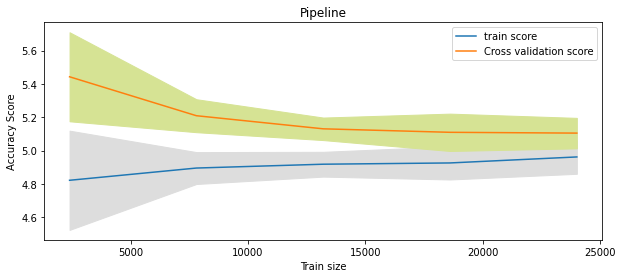

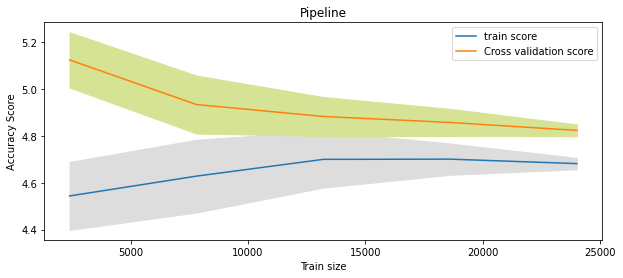

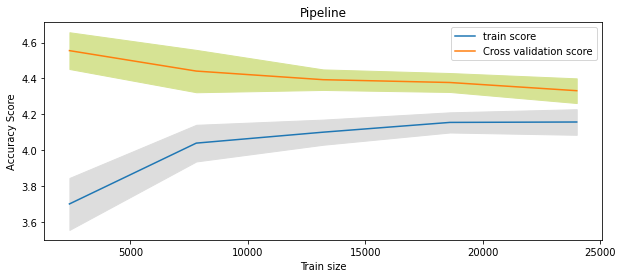

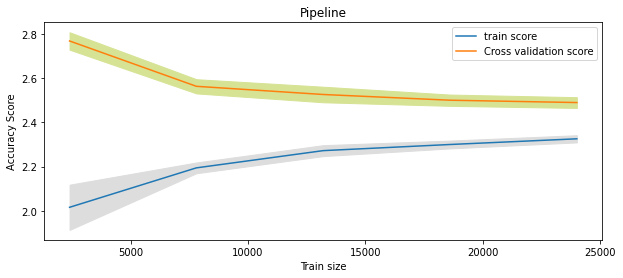

In [ ]:
#@title Evaluamos PCA con diferentes n_components (de 1 a 6) y notamos que ninguno presenta problemas de overfitting o bias, sin embargo, reduciendo la cantidad de columnas se pierde accuracy de forma significativa. El de mejor rendimiento es el n_componenets = 6, que es igual a no aplicar el método. Por lo que no es recomendable en este caso. De todas maneras, si fuera necesario usarlo, escogeríamos en n_components = 5, que es el que pierde menos accuracy.
estimator_s1 = RandomForestRegressor(max_depth=8, n_estimators=200)
for i in range(1,7):
    
    estimator_ns_pipe = Pipeline((("pca", PCA(n_components=i)), ("randomForest", estimator_s1)))

    plot_learning_curve(estimator_ns_pipe, estimator_ns_pipe.__class__.__name__, X_train_reduced, y_train_reduced, cv=cv, scoring=mae)

#### NMF y Random Forest Regressor

In [ ]:
#@title Evaluamos NMF con diferentes n_components (de 1 a 6). Se obtuvieron resultados muy poco útiles, ya que se tiene un bias muy grande en los que tienen de 2 a 6 componentes. EL único sin bias es el 1 y tiene un acccuracy poco desesable. no se recomienda este método en este caso
estimator_s1 = RandomForestRegressor(max_depth=8, n_estimators=200)
for i in range(1,7):
    print(i)
    estimator_ns_pipe = Pipeline((("nmf", NMF(n_components=i, init="random")), ("randomForest", estimator_s1)))

    plot_learning_curve(estimator_ns_pipe, estimator_ns_pipe.__class__.__name__, X_train_reduced, y_train_reduced, cv=cv, scoring=mae)

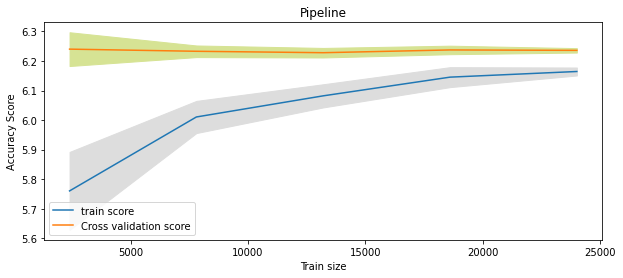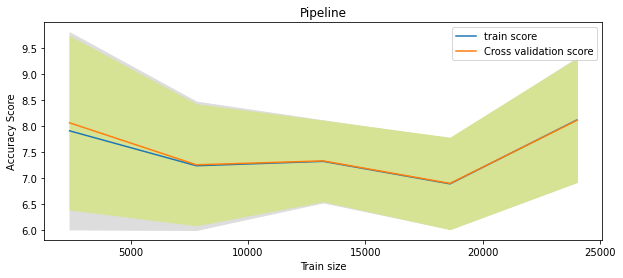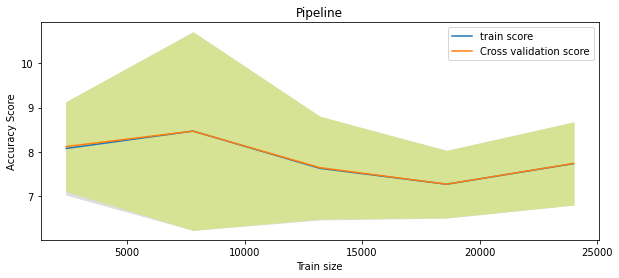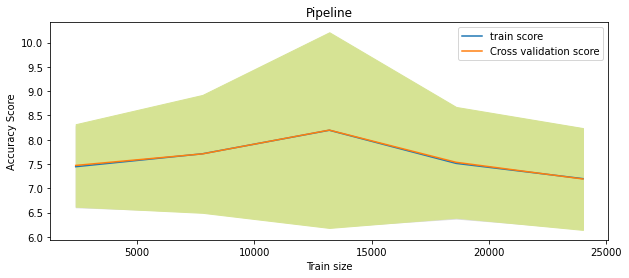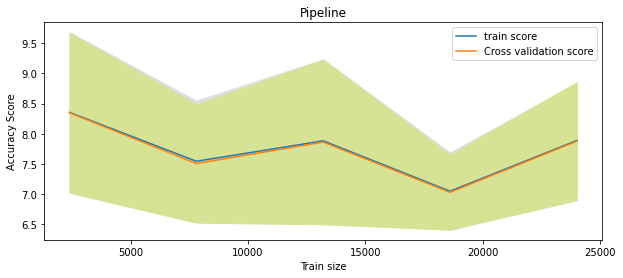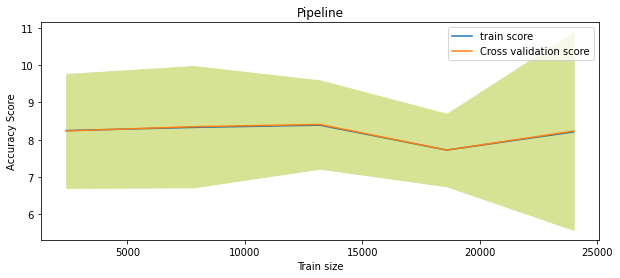

### Model Selection

Esta seccción se usa para comparar entre diferentes modelos y escoger el de mejor desempeño

In [ ]:
estimator_s1_a = RandomForestRegressor(max_depth=8, n_estimators=200)
estimator_ns1_a = Pipeline((("pca", PCA(n_components=5)), ("randomForest", estimator_s1_a)))
estimator_ns2_a = Pipeline((("nmf", NMF(n_components=1, init="random")), ("randomForest", estimator_s1_a)))

In [ ]:
estimators_list_ns = [ 
estimator_ns1_a,
estimator_ns2_a
]

In [ ]:
#@title testing with 60.000 rows (42.000 in train)
zscores_ns = []

for estimator in estimators_list_ns:
    ''' executes all estimators and prints each performance '''
    print("--")
    z = cross_validate(estimator, X_train_reduced, y_train_reduced, return_train_score=True, return_estimator=False,
                       scoring=mae, cv=cv)
    report_cv_score(z)
    zscores_ns.append(np.mean(z["test_score"]))

best_ns = np.argmin(zscores_ns)
print ("selecting ", best_ns)
best_estimator_ns = estimators_list_ns[best_ns]
print ("\nselected model")
print (best_estimator_ns)

--
test score   4.378 (±0.0428) with 10 splits
train score  4.190 (±0.0458) with 10 splits
--
test score   6.237 (±0.0187) with 10 splits
train score  6.149 (±0.0207) with 10 splits
selecting  0

selected model
Pipeline(steps=(('pca', PCA(n_components=5)),
                ('randomForest',
                 RandomForestRegressor(max_depth=8, n_estimators=200))))


In [ ]:
#@title
''' REDUCED DATASET '''
''' number of rows used '''
rows_taken = 120000
rows_available = 2000000

''' This takes rows_taken rows of the first rows_available 
E.g.  
rows_taken = a
rows_available = b

takes any a rows of the first b rows'''
reduced = df_train.copy().iloc[:rows_available].sample(rows_taken)
X_reduced = reduced.copy()
X_reduced = X_reduced.drop(columns=['pressure']).values

y_reduced = reduced.copy()
y_reduced = y_reduced["pressure"].values

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=test_size)
print("REDUCED X_train.shape, X_test.shape, y_train.shape, y_test.shape")
print(X_train_reduced.shape, X_test_reduced.shape, y_train_reduced.shape, y_test_reduced.shape)

REDUCED X_train.shape, X_test.shape, y_train.shape, y_test.shape
(84000, 7) (36000, 7) (84000,) (36000,)


In [ ]:
#@title testing with 120.000 rows (84.000 in training)
zscores_ns = []

for estimator in estimators_list_ns:
    ''' executes all estimators and prints each performance '''
    print("--")
    z = cross_validate(estimator, X_train_reduced, y_train_reduced, return_train_score=True, return_estimator=False,
                       scoring=mae, cv=cv)
    report_cv_score(z)
    zscores_ns.append(np.mean(z["test_score"]))

best_ns = np.argmin(zscores_ns)
print ("selecting ", best_ns)
best_estimator_ns = estimators_list_ns[best_ns]
print ("\nselected model")
print (best_estimator_ns)

--
test score   4.270 (±0.0534) with 10 splits
train score  4.156 (±0.0764) with 10 splits
--
test score   6.195 (±0.0120) with 10 splits
train score  6.171 (±0.0131) with 10 splits
selecting  0

selected model
Pipeline(steps=(('pca', PCA(n_components=5)),
                ('randomForest',
                 RandomForestRegressor(max_depth=8, n_estimators=200))))


## BUT if we remove the column 'breathe_id' from the dataset, we get an improvement in these two methods: 

In [ ]:
DATA_PATH = "/content/drive/MyDrive/proyecto_kagggle_presion/"

#sub = pd.read_csv(DATA_PATH + 'sample_submission.csv')
df_train_reduced = pd.read_csv(DATA_PATH + 'train.csv', index_col='id')

df_train_reduced = df_train_reduced.drop(columns=['breath_id'])

In [ ]:
df_train_reduced

In [ ]:

''' REDUCED DATASET '''
''' number of rows used '''
rows_taken = 60000
rows_available = 2000000

''' This takes rows_taken rows of the first rows_available 
E.g.  
rows_taken = a
rows_available = b

takes any a rows of the first b rows'''
reduced = df_train_reduced.copy().iloc[:rows_available].sample(rows_taken)
X_reduced = reduced.copy()
X_reduced = X_reduced.drop(columns=['pressure']).values

y_reduced = reduced.copy()
y_reduced = y_reduced["pressure"].values

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=test_size)
print("REDUCED X_train.shape, X_test.shape, y_train.shape, y_test.shape")
print(X_train_reduced.shape, X_test_reduced.shape, y_train_reduced.shape, y_test_reduced.shape)

REDUCED X_train.shape, X_test.shape, y_train.shape, y_test.shape
(42000, 5) (18000, 5) (42000,) (18000,)


#### PCA y RFR quitando la columna 'breathe_id' del dataset

In [ ]:
#@title Evaluamos PCA con diferentes n_components (de 1 a 6) pero sin la columna 'breathe_id' en el dataset, se nota una mejoria clara en el rendimiento comparado con el PCA que incluye dicha columna. Todos pierden accuracy respecto a no usar PCA, pero se gana rendimiento computacional. Dependiendo del caso se podría usar un n_componenets = 4 o 5 sin perder mucho accuracy.
for i in range(1,6):
    
    estimator_ns_pipe = Pipeline((("pca", PCA(n_components=i)), ("randomForest", estimator_s1_b)))

    plot_learning_curve(estimator_ns_pipe, estimator_ns_pipe.__class__.__name__, X_train_reduced, y_train_reduced, cv=cv, scoring=mae)

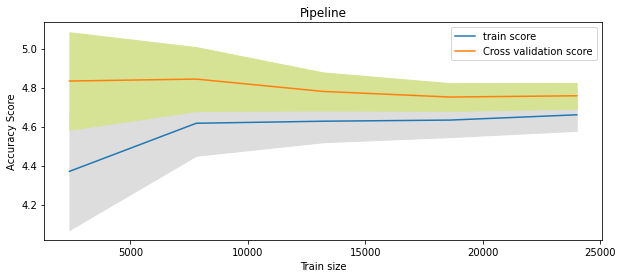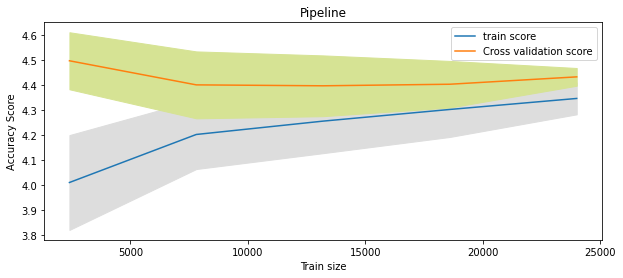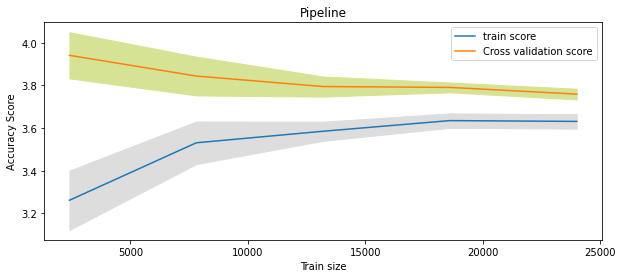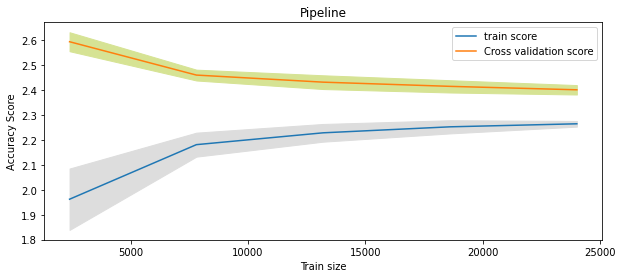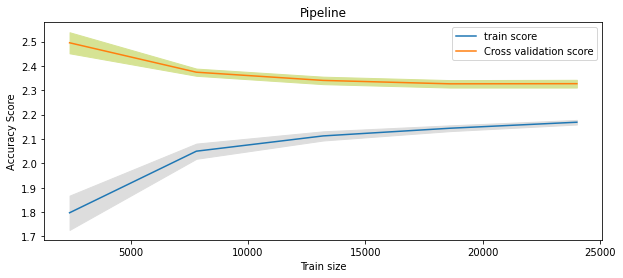

#### NMF y RFR quitando la columna 'breathe_id' del dataset

In [ ]:
#@title Evaluamos NMF con diferentes n_components (de 1 a 6) pero sin la columna 'breathe_id' en el dataset, se nota una mejoria clara en el rendimiento comparado con el NMF que incluye dicha columna. De todas maneras, todos sufren de alto bias, el que menos bias tiene es el n_components = 1 pero tiene peor accuracy

estimator_s1_b = RandomForestRegressor(max_depth=8, n_estimators=200)
for i in range(1,6):
    print(i)
    estimator_ns_pipe = Pipeline((("nmf", NMF(n_components=i, init="random")), ("randomForest", estimator_s1_b)))

    plot_learning_curve(estimator_ns_pipe, estimator_ns_pipe.__class__.__name__, X_train_reduced, y_train_reduced, cv=cv, scoring=mae)

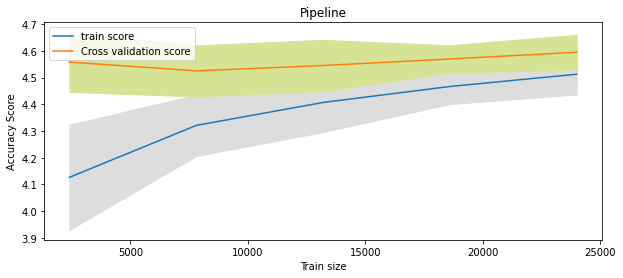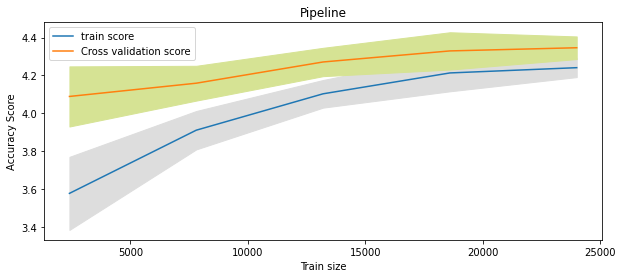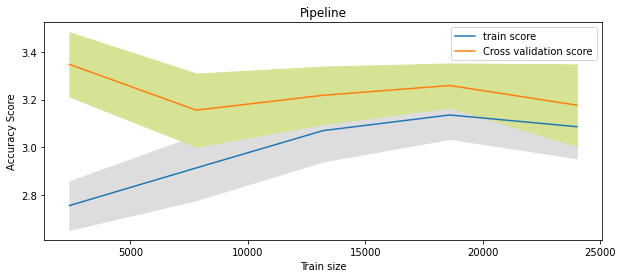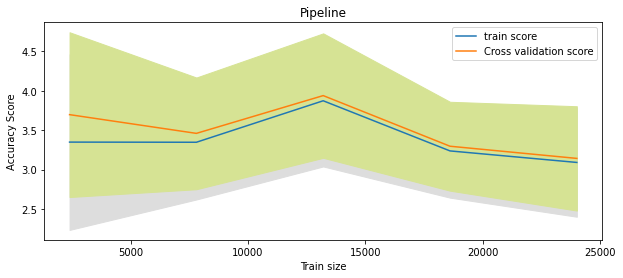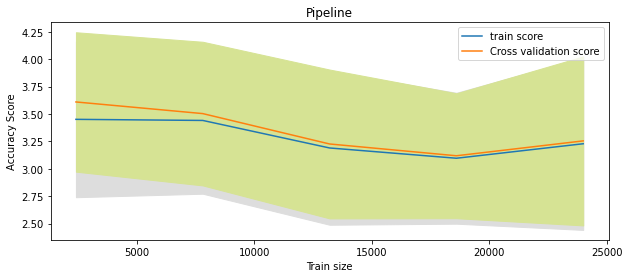

### Model selection

In [ ]:
estimator_s1_b = RandomForestRegressor(max_depth=8, n_estimators=200)
estimator_ns1_b = Pipeline((("pca", PCA(n_components=4)), ("randomForest", estimator_s1_a)))
estimator_ns2_b = Pipeline((("nmf", NMF(n_components=1, init="random")), ("randomForest", estimator_s1_a)))

In [ ]:
estimators_list_ns_b = [ 
estimator_ns1_b,
estimator_ns2_b
]

### No 'breathe_id' column testing PCA and NMF

In [ ]:
#@title testing with 60.000 rows (42.000 in train) and no 'breathe_id' column
zscores_ns_b = []

for estimator in estimators_list_ns_b:
    ''' executes all estimators and prints each performance '''
    print("--")
    z = cross_validate(estimator, X_train_reduced, y_train_reduced, return_train_score=True, return_estimator=False,
                       scoring=mae, cv=cv)
    report_cv_score(z)
    zscores_ns_b.append(np.mean(z["test_score"]))

best_ns_b = np.argmin(zscores_ns_b)
print ("selecting ", best_ns_b)
best_estimator_ns_b = estimators_list_ns_b[best_ns_b]
print ("\nselected model")
print (best_estimator_ns_b)

--
test score   2.411 (±0.0148) with 10 splits
train score  2.296 (±0.0169) with 10 splits
--
test score   4.418 (±0.0501) with 10 splits
train score  4.334 (±0.0748) with 10 splits
selecting  0

selected model
Pipeline(steps=(('pca', PCA(n_components=4)),
                ('randomForest',
                 RandomForestRegressor(max_depth=8, n_estimators=200))))
